In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.1,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [ ]:
trainset='/content/drive/MyDrive/Colab Notebooks/FOODfruit/train'

In [ ]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 34 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


In [ ]:
validation_set.class_indices

{'Bơ': 0,
 'Chuối': 1,
 'Dâu': 2,
 'Khế': 3,
 'Mãng Cầu': 4,
 'Măng cụt': 5,
 'Mít': 6,
 'Ổi': 7,
 'Sầu Riêng': 8,
 'Xoài': 9}

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=100,verbose=1,validation_data=validation_set)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 3.4121 - accuracy: 0.0588
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 9.2452 - accuracy: 0.1471
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 6.6267 - accuracy: 0.1176
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 3.5705 - accuracy: 0.0882
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 2.4796 - accuracy: 0.0294
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 2.2693 - accuracy: 0.1471
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 2.2508 - accuracy: 0.1765
Epoch 8/100
1/1 [==============================] - 3s 3s/step - loss: 2.2575 - accuracy: 0.2353
Epoch 9/100
1/1 [==============================] - 3s 3s/step - loss: 2.2275 - accuracy: 0.2647
Epoch 10/100
1/1 [==============================] - 3s 3s/step - loss: 2.2181 - accuracy: 0.2941
Epoch 11/100
1/1 [=====================

In [ ]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 34 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


In [ ]:
model.save('traicay.hs')

INFO:tensorflow:Assets written to: traicay.hs/assets


In [ ]:
model1=load_model('traicay.hs')

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img=load_img('/content/drive/MyDrive/Colab Notebooks/FOODfruit/train/Xoài/x.jpg',target_size=(100,100))
img=img_to_array(img)
img=img.reshape(1,100,100,3)
img=img.astype('float32')
img=img/255
np.argmax(model1.predict(img),axis=-1)

array([9])

In [ ]:
label = ['Mit','Sau rieng','Mang cut','oi','khe','mang cau','bo','chuoi','Dau','Xoai']

Xoai


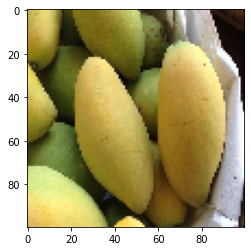

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/Colab Notebooks/FOODfruit/train/Xoài/x.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])